In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler

# 1- loading dataset

In [3]:
df = pd.read_csv("diabetes_dataset00.csv")

#### 1.1 explore data and under standing

In [4]:
df.shape

(70000, 34)

In [5]:
df.head()

,Target,Genetic Markers,Autoantibodies,Family History,Environmental Factors,Insulin Levels,Age,BMI,Physical Activity,Dietary Habits,...,Pulmonary Function,Cystic Fibrosis Diagnosis,Steroid Use History,Genetic Testing,Neurological Assessments,Liver Function Tests,Digestive Enzyme Levels,Urine Test,Birth Weight,Early Onset Symptoms
0,Steroid-Induced Diabetes,Positive,Negative,No,Present,40,44,38,High,Healthy,...,76,No,No,Positive,3,Normal,56,Ketones Present,2629,No
1,Neonatal Diabetes Mellitus (NDM),Positive,Negative,No,Present,13,1,17,High,Healthy,...,60,Yes,No,Negative,1,Normal,28,Glucose Present,1881,Yes
2,Prediabetic,Positive,Positive,Yes,Present,27,36,24,High,Unhealthy,...,80,Yes,No,Negative,1,Abnormal,55,Ketones Present,3622,Yes
3,Type 1 Diabetes,Negative,Positive,No,Present,8,7,16,Low,Unhealthy,...,89,Yes,No,Positive,2,Abnormal,60,Ketones Present,3542,No
4,Wolfram Syndrome,Negative,Negative,Yes,Present,17,10,17,High,Healthy,...,41,No,No,Positive,1,Normal,24,Protein Present,1770,No


In [6]:
df.tail(1)

,Target,Genetic Markers,Autoantibodies,Family History,Environmental Factors,Insulin Levels,Age,BMI,Physical Activity,Dietary Habits,...,Pulmonary Function,Cystic Fibrosis Diagnosis,Steroid Use History,Genetic Testing,Neurological Assessments,Liver Function Tests,Digestive Enzyme Levels,Urine Test,Birth Weight,Early Onset Symptoms
69999,LADA,Positive,Positive,Yes,Absent,27,41,28,Moderate,Healthy,...,84,No,Yes,Negative,2,Abnormal,64,Ketones Present,3593,Yes


In [7]:
df.columns

Index(['Target', 'Genetic Markers', 'Autoantibodies', 'Family History',
       'Environmental Factors', 'Insulin Levels', 'Age', 'BMI',
       'Physical Activity', 'Dietary Habits', 'Blood Pressure',
       'Cholesterol Levels', 'Waist Circumference', 'Blood Glucose Levels',
       'Ethnicity', 'Socioeconomic Factors', 'Smoking Status',
       'Alcohol Consumption', 'Glucose Tolerance Test', 'History of PCOS',
       'Previous Gestational Diabetes', 'Pregnancy History',
       'Weight Gain During Pregnancy', 'Pancreatic Health',
       'Pulmonary Function', 'Cystic Fibrosis Diagnosis',
       'Steroid Use History', 'Genetic Testing', 'Neurological Assessments',
       'Liver Function Tests', 'Digestive Enzyme Levels', 'Urine Test',
       'Birth Weight', 'Early Onset Symptoms'],
      dtype='object')

In [8]:
for column in df.columns :
    print(f"unique values in {column} : {df[column].unique()} \n")

unique values in Target : ['Steroid-Induced Diabetes' 'Neonatal Diabetes Mellitus (NDM)'
 'Prediabetic' 'Type 1 Diabetes' 'Wolfram Syndrome' 'LADA'
 'Type 2 Diabetes' 'Wolcott-Rallison Syndrome' 'Secondary Diabetes'
 'Type 3c Diabetes (Pancreatogenic Diabetes)' 'Gestational Diabetes'
 'Cystic Fibrosis-Related Diabetes (CFRD)' 'MODY'] 

unique values in Genetic Markers : ['Positive' 'Negative'] 

unique values in Autoantibodies : ['Negative' 'Positive'] 

unique values in Family History : ['No' 'Yes'] 

unique values in Environmental Factors : ['Present' 'Absent'] 

unique values in Insulin Levels : [40 13 27  8 17 29 10 47 21 16 22  9 38 14 12 30 19 42 34 11 24 44 20 15
 18  6 28 48  5 46 26 45 33 23 41 39  7 31 35 25 32 36 43 49 37] 

unique values in Age : [44  1 36  7 10 41 30  3 47 72 67 29 59  0 45 53 60 16 35 14 64  9 65 34
 51 11 56 37 22 70 33 50 62 40 28 12 38 19 39 46 43 77 73 32  5 49 26 52
 21 54 18 42 31 23 58 13  8 48 55 17 24 25 79  6  2  4 69 27 15 61 20 66
 68 78 57 71

In [9]:
type(df['Target']) # mean the type of data structure

pandas.core.series.Series

In [10]:
print(df['Target'].dtype) # mean the type of the storied data

object


In [11]:
df.describe()

,Insulin Levels,Age,BMI,Blood Pressure,Cholesterol Levels,Waist Circumference,Blood Glucose Levels,Weight Gain During Pregnancy,Pancreatic Health,Pulmonary Function,Neurological Assessments,Digestive Enzyme Levels,Birth Weight
count,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000
mean,21.607443,32.020700,24.782943,111.339543,194.867200,35.051657,160.701657,15.496414,47.564243,70.264671,1.804157,46.420529,3097.061071
std,10.785852,21.043173,6.014236,19.945000,44.532466,6.803461,48.165547,9.633096,19.984683,11.965600,0.680154,19.391089,713.837300
min,5.000000,0.000000,12.000000,60.000000,100.000000,20.000000,80.000000,0.000000,10.000000,30.000000,1.000000,10.000000,1500.000000
25%,13.000000,14.000000,20.000000,99.000000,163.000000,30.000000,121.000000,7.000000,32.000000,63.000000,1.000000,31.000000,2629.000000
50%,19.000000,31.000000,25.000000,113.000000,191.000000,34.000000,152.000000,16.000000,46.000000,72.000000,2.000000,48.000000,3103.000000
75%,28.000000,49.000000,29.000000,125.000000,225.000000,39.000000,194.000000,22.000000,64.000000,79.000000,2.000000,61.000000,3656.250000
max,49.000000,79.000000,39.000000,149.000000,299.000000,54.000000,299.000000,39.000000,99.000000,89.000000,3.000000,99.000000,4499.000000


In [12]:
df.isna().sum(). sum()

0

### now convert the target to numerical by label encoding

In [16]:
from sklearn.preprocessing import LabelEncoder

# Convert multi-class target to numerical labels
label_encoder = LabelEncoder()
df_target_encoded = df
df_target_encoded['Target'] = label_encoder.fit_transform(df['Target']) #use label encoded in this case for target because model return one output but you can use one hot if you use NN
df_target_encoded.head(2)

,Target,Genetic Markers,Autoantibodies,Family History,Environmental Factors,Insulin Levels,Age,BMI,Physical Activity,Dietary Habits,...,Pulmonary Function,Cystic Fibrosis Diagnosis,Steroid Use History,Genetic Testing,Neurological Assessments,Liver Function Tests,Digestive Enzyme Levels,Urine Test,Birth Weight,Early Onset Symptoms
0,7,Positive,Negative,No,Present,40,44,38,High,Healthy,...,76,No,No,Positive,3,Normal,56,Ketones Present,2629,No
1,4,Positive,Negative,No,Present,13,1,17,High,Healthy,...,60,Yes,No,Negative,1,Normal,28,Glucose Present,1881,Yes


#### 1.2 visualization for understanding the relations

## feature extraction

In [17]:
print(df_encoded.columns)

Index(['Target', 'Insulin Levels', 'Age', 'BMI', 'Blood Pressure',
       'Cholesterol Levels', 'Waist Circumference', 'Blood Glucose Levels',
       'Weight Gain During Pregnancy', 'Pancreatic Health',
       'Pulmonary Function', 'Neurological Assessments',
       'Digestive Enzyme Levels', 'Birth Weight', 'Genetic Markers_Negative',
       'Genetic Markers_Positive', 'Autoantibodies_Negative',
       'Autoantibodies_Positive', 'Family History_No', 'Family History_Yes',
       'Environmental Factors_Absent', 'Environmental Factors_Present',
       'Physical Activity_High', 'Physical Activity_Low',
       'Physical Activity_Moderate', 'Dietary Habits_Healthy',
       'Dietary Habits_Unhealthy', 'Ethnicity_High Risk', 'Ethnicity_Low Risk',
       'Socioeconomic Factors_High', 'Socioeconomic Factors_Low',
       'Socioeconomic Factors_Medium', 'Smoking Status_Non-Smoker',
       'Smoking Status_Smoker', 'Alcohol Consumption_High',
       'Alcohol Consumption_Low', 'Alcohol Consumption_M

In [18]:
columns = [column for column in df.columns if df[column].dtype == 'object' and column != "Target" ]
print(columns)

['Genetic Markers', 'Autoantibodies', 'Family History', 'Environmental Factors', 'Physical Activity', 'Dietary Habits', 'Ethnicity', 'Socioeconomic Factors', 'Smoking Status', 'Alcohol Consumption', 'Glucose Tolerance Test', 'History of PCOS', 'Previous Gestational Diabetes', 'Pregnancy History', 'Cystic Fibrosis Diagnosis', 'Steroid Use History', 'Genetic Testing', 'Liver Function Tests', 'Urine Test', 'Early Onset Symptoms']


In [19]:
df_encoded = pd.get_dummies(df_target_encoded , columns =columns)
df_encoded.shape

(70000, 59)

In [33]:
df_encoded.columns

Index(['Target', 'Insulin Levels', 'Age', 'BMI', 'Blood Pressure',
       'Cholesterol Levels', 'Waist Circumference', 'Blood Glucose Levels',
       'Weight Gain During Pregnancy', 'Pancreatic Health',
       'Pulmonary Function', 'Neurological Assessments',
       'Digestive Enzyme Levels', 'Birth Weight', 'Genetic Markers_Negative',
       'Genetic Markers_Positive', 'Autoantibodies_Negative',
       'Autoantibodies_Positive', 'Family History_No', 'Family History_Yes',
       'Environmental Factors_Absent', 'Environmental Factors_Present',
       'Physical Activity_High', 'Physical Activity_Low',
       'Physical Activity_Moderate', 'Dietary Habits_Healthy',
       'Dietary Habits_Unhealthy', 'Ethnicity_High Risk', 'Ethnicity_Low Risk',
       'Socioeconomic Factors_High', 'Socioeconomic Factors_Low',
       'Socioeconomic Factors_Medium', 'Smoking Status_Non-Smoker',
       'Smoking Status_Smoker', 'Alcohol Consumption_High',
       'Alcohol Consumption_Low', 'Alcohol Consumption_M

In [20]:
correlation_matrix1 = df_encoded[df_encoded.columns[:20]].corr()

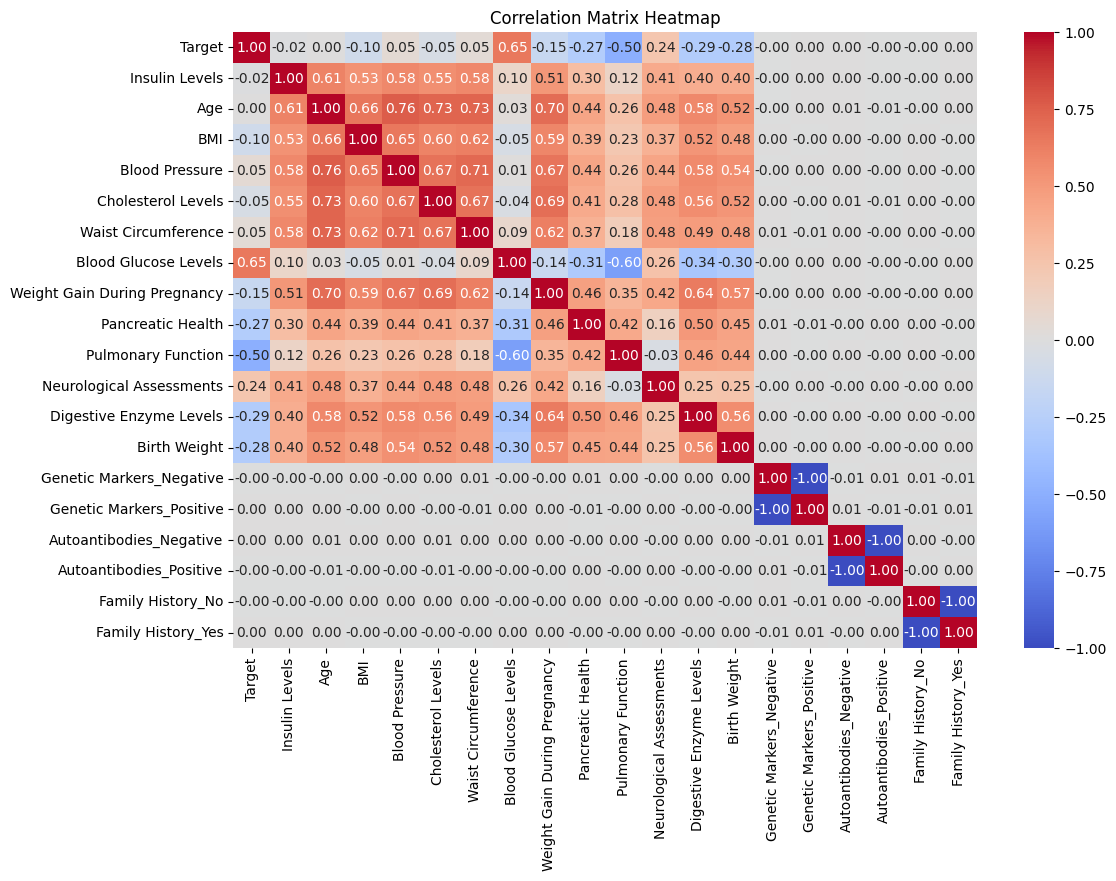

In [21]:
# Create a heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix1, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix Heatmap')
plt.show()

In [22]:
selected_columns = [df_encoded.columns[0]] + list(df_encoded.columns[20:40])

correlation_matrix2 = df_encoded[selected_columns].corr()

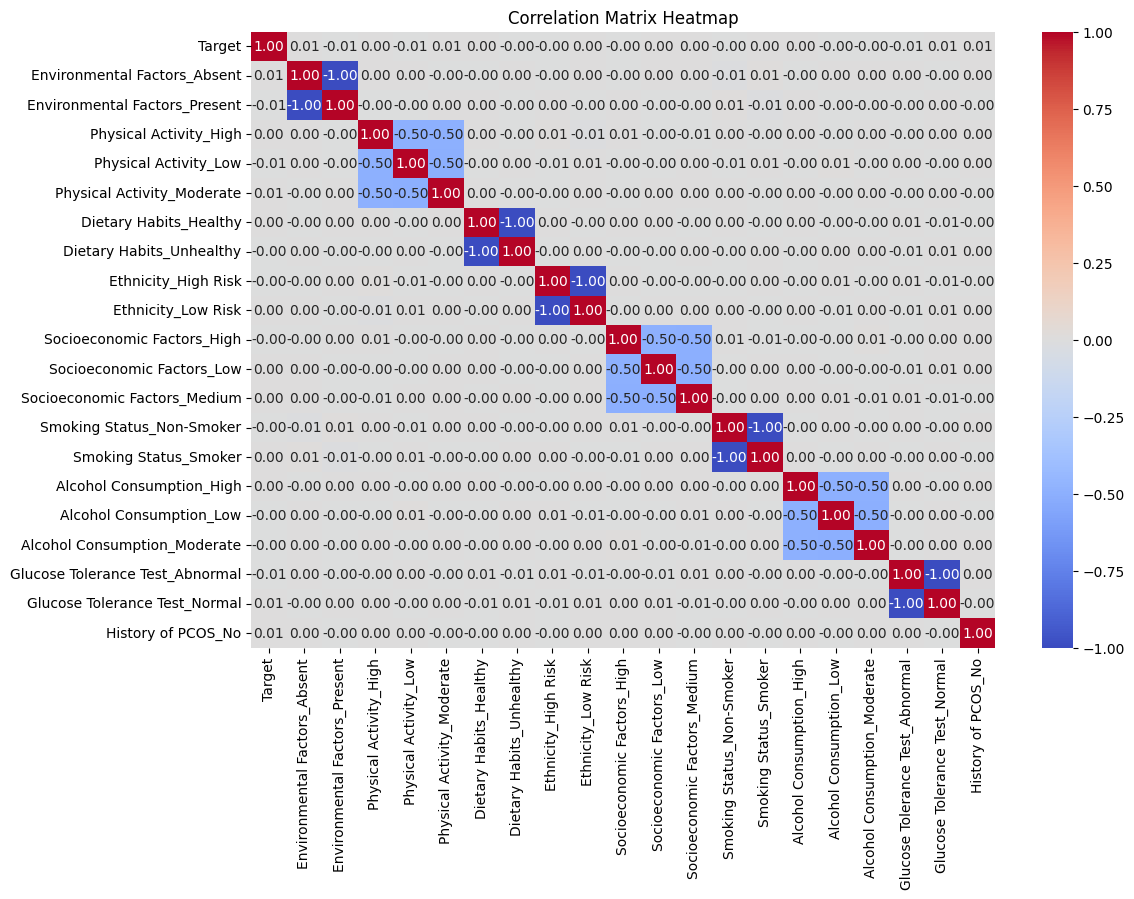

In [23]:
# Create a heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix2, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix Heatmap')
plt.show()

In [24]:
selected_columns3 = [df_encoded.columns[0]] + list(df_encoded.columns[20:40])
correlation_matrix3 = df_encoded[selected_columns3].corr()

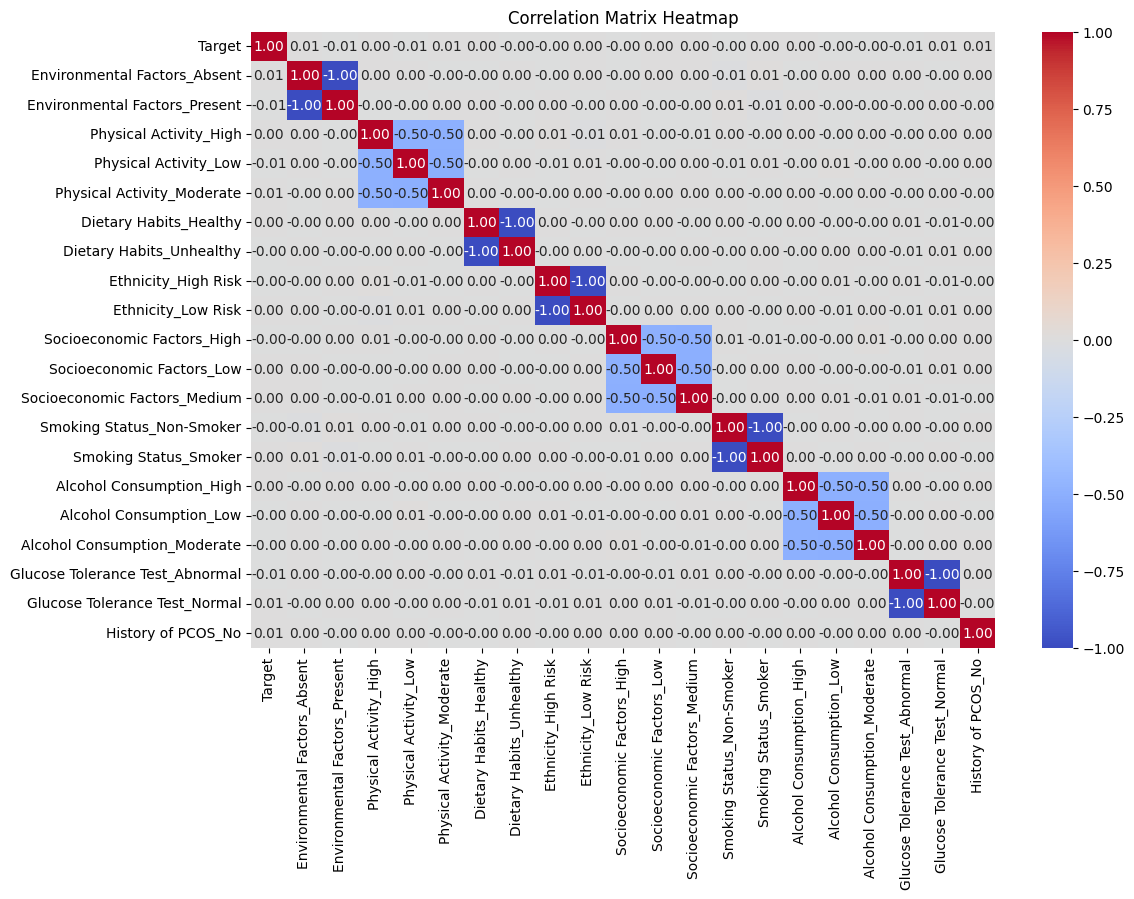

In [25]:
# Create a heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix3, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix Heatmap')
plt.show()

## --------------------------- (info) --------------------------
this is a good info is the features will be 13 only from correlation i can know what has effect on target now i can do my train

------------------------------------------------------

# feature selection

In [26]:
final_df = df_encoded[df_encoded.columns[:13]]

In [27]:
final_correlation = final_df.corr()

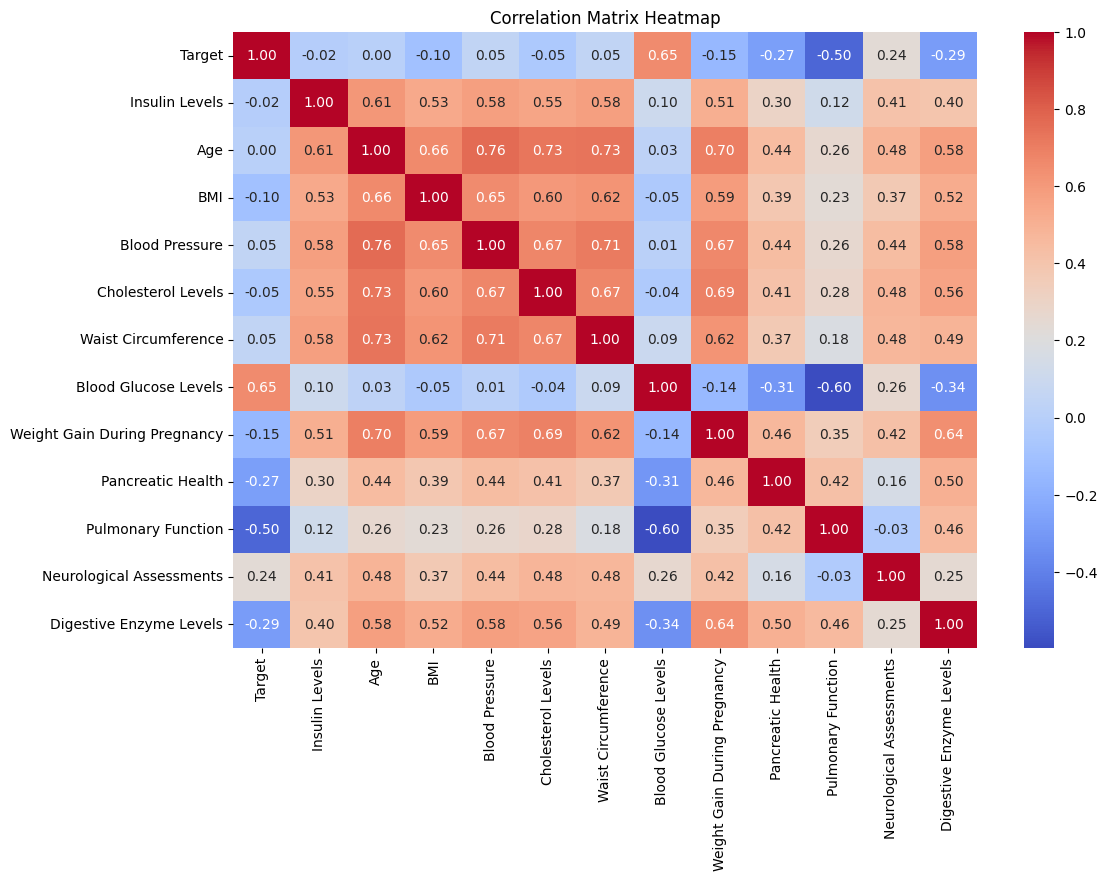

In [28]:
plt.figure(figsize=(12, 8))
sns.heatmap(final_correlation, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix Heatmap')
plt.show()

# for good model you should do scaling in all features convert the categorical data to numirical by one hot encoding

# after scaling ready to modeling

In [ ]:
x = df_encoded.drop(columns = ['Target'])
y = df_encoded['Target']

scaler  = StandardScaler()
x_scaled = scaler.fit_transform(x)
type(x_scaled)

numpy.ndarray

In [30]:
x_scaled = pd.DataFrame(x_scaled ,  columns = x.columns)
x_scaled.head(2)

,Insulin Levels,Age,BMI,Blood Pressure,Cholesterol Levels,Waist Circumference,Blood Glucose Levels,Weight Gain During Pregnancy,Pancreatic Health,Pulmonary Function,...,Genetic Testing_Negative,Genetic Testing_Positive,Liver Function Tests_Abnormal,Liver Function Tests_Normal,Urine Test_Glucose Present,Urine Test_Ketones Present,Urine Test_Normal,Urine Test_Protein Present,Early Onset Symptoms_No,Early Onset Symptoms_Yes
0,1.705261,0.569277,2.197644,0.634773,0.137716,2.197183,0.151527,0.259896,-0.578659,0.479322,...,-0.991040,0.991040,-0.999457,0.999457,-0.575635,1.737213,-0.577966,-0.580166,0.998316,-0.998316
1,-0.798037,-1.474156,-1.294096,-1.922277,-1.658739,-1.624429,0.359146,-0.778199,-1.079046,-0.857855,...,1.009041,-1.009041,-0.999457,0.999457,1.737213,-0.575635,-0.577966,-0.580166,-1.001687,1.001687


In [32]:
from sklearn.model_selection import train_test_split

x_train , x_test ,  y_train , y_test = train_test_split(x_scaled , y , test_size =0.2 ,  random_state=0)

print("X_train shape:", x_train.shape)
print("X_test shape:", x_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

X_train shape: (56000, 58)
X_test shape: (14000, 58)
y_train shape: (56000,)
y_test shape: (14000,)


In [ ]:
from sklearn.ensemble import RandomForestClassifier

model_forest = RandomForestClassifier(random_state = 42)

model_forest.fit(x_train , y_train)